NAME: DEV AGARWAL REG NO: 220968019 SECTION: A ROLL NO: 06 BATCH: 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data = pd.read_csv('diabetes.csv')
df = pd.DataFrame(data)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


UNDERSTANDING THE DATA

In [3]:
df.shape

(768, 9)

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df = df.drop_duplicates()

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
X = df.drop('Outcome', axis = 1)
y = df[['Outcome']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
print(X_train.shape)

(614, 8)


In [12]:
print(X_test.shape)

(154, 8)


STANDARDIZING THE DATA

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
np.mean(df['Pregnancies'])

3.8450520833333335

In [20]:
X_train

array([[ 0.90832902,  0.91569367,  0.44912368, ...,  0.37852648,
         0.67740401,  1.69955804],
       [ 0.03644676, -0.75182191, -0.47230103, ..., -0.50667229,
        -0.07049698, -0.96569189],
       [-1.12606292,  1.38763205,  1.06340683, ...,  2.54094063,
        -0.11855487, -0.88240283],
       ...,
       [ 0.03644676, -0.84620959, -0.21634972, ..., -0.94927168,
        -0.95656442, -1.04898095],
       [ 2.0708387 , -1.12937261,  0.24436264, ..., -0.26640405,
        -0.50001442,  0.11706589],
       [ 0.32707418,  0.47521786,  0.65388473, ..., -4.07275877,
         0.52121586,  2.94889395]])

LOGISTIC REGRESSION

In [28]:
reg = LogisticRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EVALUATION METRICS

In [29]:
print("accuracy score is: ",accuracy_score(y_pred,y_test))

accuracy score is:  0.8246753246753247


In [30]:
confusion_matrix(y_pred,y_test)

array([[98, 18],
       [ 9, 29]], dtype=int64)

In [31]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.92      0.84      0.88       116\n           1       0.62      0.76      0.68        38\n\n    accuracy                           0.82       154\n   macro avg       0.77      0.80      0.78       154\nweighted avg       0.84      0.82      0.83       154\n'

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

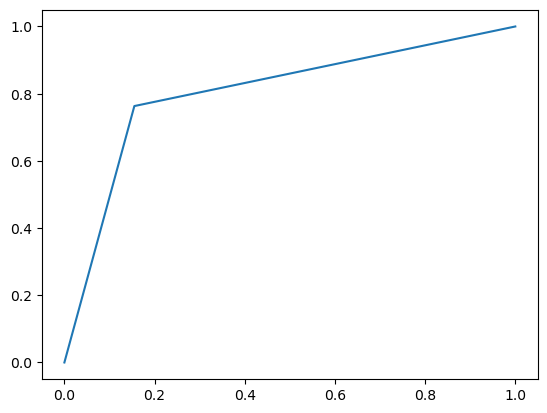

In [33]:
tpr, fpr, threshold = roc_curve(y_pred, y_test)
plt.plot(tpr,fpr)

In [34]:
roc_auc_score(y_pred,y_test)

0.8039927404718693

In [35]:
print(threshold)

[2 1 0]


In [36]:
from sklearn.model_selection import KFold, cross_val_score

In [37]:
k_folds = KFold(n_splits = 5)
scores = cross_val_score(reg, X, y, cv = k_folds)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

In [38]:
scores

array([0.77272727, 0.72077922, 0.75324675, 0.82352941, 0.75163399])

In [39]:
scores.mean()

0.7643833290892115

In [40]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components = 2)

In [49]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [50]:
X_train_pca.shape

(614, 2)

In [67]:
X_train_pca.shape

(614, 2)

In [55]:
X_test_pca.shape

(154, 2)

In [52]:
reg1 = LogisticRegression()

In [53]:
reg1.fit(X_train_pca,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [56]:
y_pred1 = reg1.predict(X_test_pca)

In [57]:
accuracy_score(y_pred1,y_test)

0.7597402597402597

In [58]:
confusion_matrix(y_pred1,y_test)

array([[94, 24],
       [13, 23]], dtype=int64)

In [68]:
df1 = pd.DataFrame(X_train_pca)

In [70]:
df1['outcome'] = y_train

In [81]:
df1 = df1.rename({0: 'X', 1: 'Y'}, axis=1)

In [82]:
df1

,X,Y,outcome
0,1.559030,1.619141,1.0
1,-1.064869,-0.737901,NaN
2,4.491926,-2.070487,NaN
3,-0.428485,-1.438518,0.0
4,-2.384301,0.790840,1.0
...,...,...,...
609,1.272159,1.973861,0.0
610,-0.604116,1.461820,0.0
611,-1.510110,-0.623115,1.0
612,-1.367508,1.671168,1.0


<Axes: xlabel='X', ylabel='Y'>

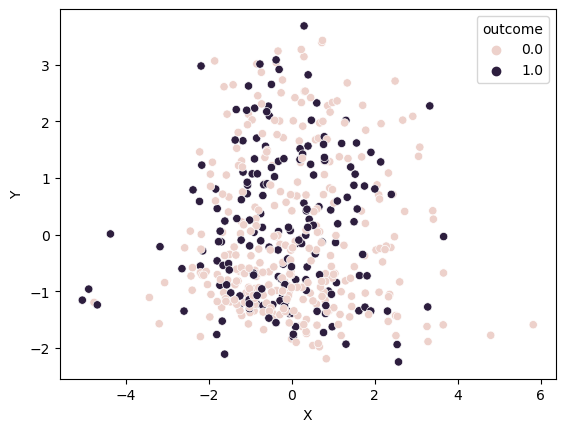

In [86]:
sns.scatterplot(x = 'X',y = 'Y',data = df1, hue = 'outcome')